In [60]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
raw_data = pd.read_csv('epi_r.csv')
dfo = pd.DataFrame(raw_data)
dfo

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
list(dfo.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
dfo.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

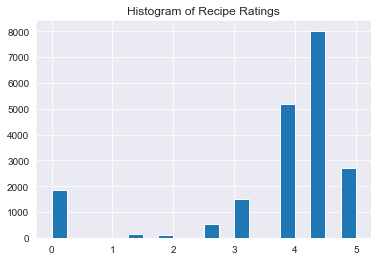

In [6]:
dfo.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = dfo.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = dfo.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = dfo.rating.sample(frac=0.3, replace=True, random_state=1)

svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

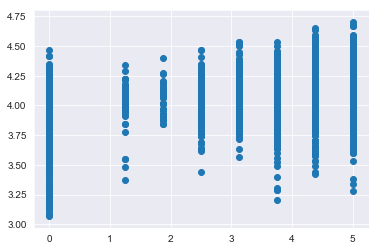

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.003978314483867873

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [11]:
#Lets clean the data up a little bit

In [8]:
#Drop null values

dfo = dfo.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [9]:
# Count nulls 
null_count = dfo.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [10]:
from sklearn.svm import SVR
svr = SVR()
X = dfo.drop(['rating', 'title'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = dfo.rating.sample(frac=0.3, replace=True, random_state=1)

svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
svr.score(X, Y)

0.2620537135881924

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([ 0.06688949, -0.00789176,  0.02235577,  0.00139001, -0.00793259])

In [28]:
#A huge improvement from before, lets do some feature selection now

[1.87478923e-06 0.00000000e+00 5.33089593e-05 1.77054497e-03
 3.87237167e-06 1.32822732e-03 0.00000000e+00 0.00000000e+00
 5.45619514e-04 2.39055137e-03 3.06018768e-04 1.69271436e-03
 9.65474472e-04 3.23731754e-04 0.00000000e+00 4.80308364e-04
 3.06453615e-03 3.23395760e-03 0.00000000e+00 2.03001007e-03
 6.78484327e-06 1.26301931e-03 1.15767011e-03 6.84667804e-04
 8.29142957e-04 0.00000000e+00 0.00000000e+00 1.33875502e-05
 2.30880423e-03 1.17387516e-03 2.94549045e-03 1.70108699e-03
 1.01868687e-02 1.93283816e-03 3.85005323e-04 3.27599345e-03
 1.08330787e-03 1.35703264e-04 2.27866592e-03 2.10867430e-03
 9.55295674e-05 1.41937889e-05 1.95088596e-04 2.97389856e-04
 1.01093056e-03 1.72531966e-03 2.88818960e-03 0.00000000e+00
 2.58358144e-04 5.61164981e-05 2.79899896e-04 1.60142448e-03
 3.83115889e-03 9.53529068e-04 1.07944687e-03 2.74252093e-03
 2.90754914e-05 1.03455473e-02 5.49907436e-04 4.02454754e-06
 1.84093627e-03 6.08790023e-04 0.00000000e+00 1.94504195e-03
 2.24596895e-03 2.665421

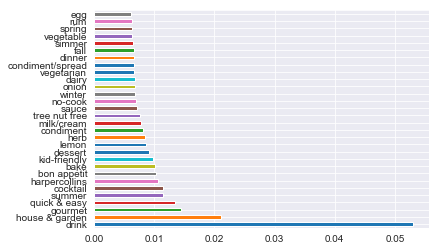

In [66]:
X = dfo.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
y = dfo.iloc[:,1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_) #feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

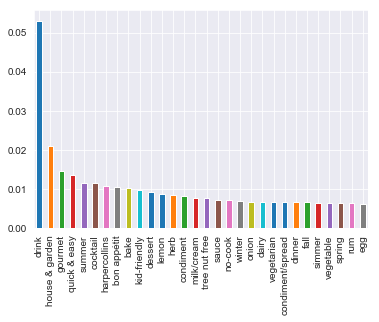

In [67]:
feat_importances.nlargest(30).plot(kind='bar')
plt.show()

In [70]:
feat_importances.nlargest(30)

drink               0.053036
house & garden      0.021035
gourmet             0.014458
quick & easy        0.013511
summer              0.011409
cocktail            0.011406
harpercollins       0.010598
bon appétit         0.010346
bake                0.010187
kid-friendly        0.009746
dessert             0.009128
lemon               0.008546
herb                0.008449
condiment           0.008200
milk/cream          0.007721
tree nut free       0.007700
sauce               0.007053
no-cook             0.007007
winter              0.006773
onion               0.006720
dairy               0.006711
vegetarian          0.006666
condiment/spread    0.006610
dinner              0.006597
fall                0.006543
simmer              0.006441
vegetable           0.006355
spring              0.006328
rum                 0.006236
egg                 0.006171
dtype: float64

In [113]:
#Let's set our top features and re run the model
xnew = dfo.loc[:, ['house & garden', 'gourmet','quick & easy', 'summer', 'harpercollins', 'bon appétit', 'bake','drink', 'kid-friendly', 'dessert', 'lemon', 'herb', 'condiment', 'milk/cream', 'tree nut free', 'sauce', 'no-cook', 'winter', 'onion', 'dairy', 'vegetarian', 'condiment/spread', 'dinner', 'fall', 'simmer', 'vegetable', 'spring', 'egg', 'fat', 'calories', 'sodium','protein']]

In [114]:
from sklearn.svm import SVR
svr = SVR()
x = xnew
y = dfo.rating

svr.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
svr.score(x, y)

0.5166754168287935

In [118]:
#Went from an accuracy of -0.00397 all the way to an accuracy of .5167 just from choosing
#our features better
#PCA theoretically would do a better job of this, we are losing data from the other features
#(even thought the other features arent as important they still contain data)
#Ask Mukesh about using PCA for this problem

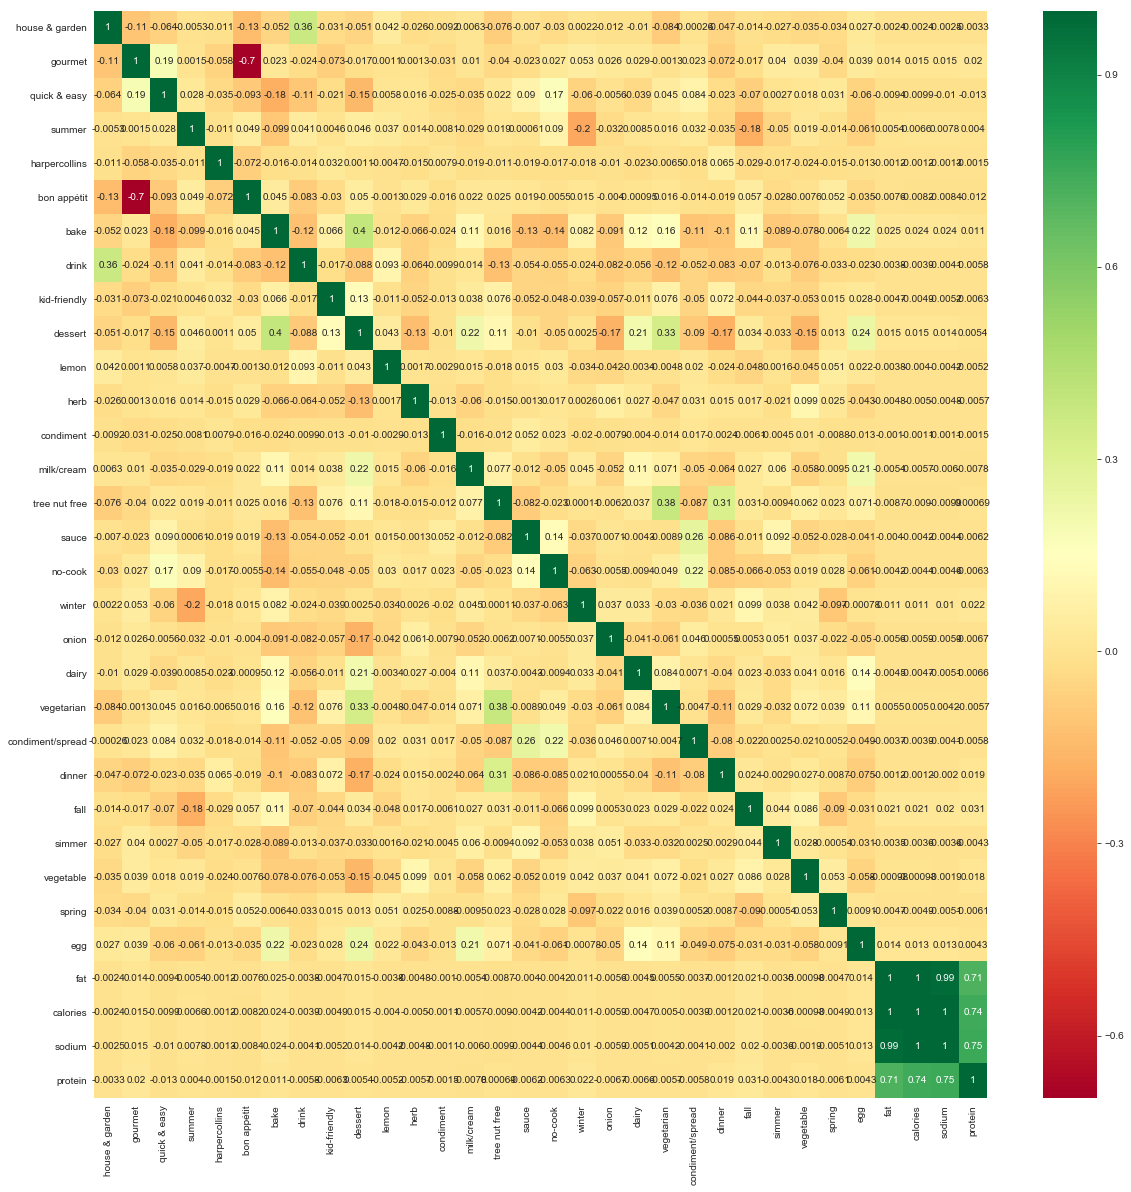

In [120]:
corrmat = xnew.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(xnew[top_corr_features].corr(),annot=True,cmap="RdYlGn")